In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 757.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

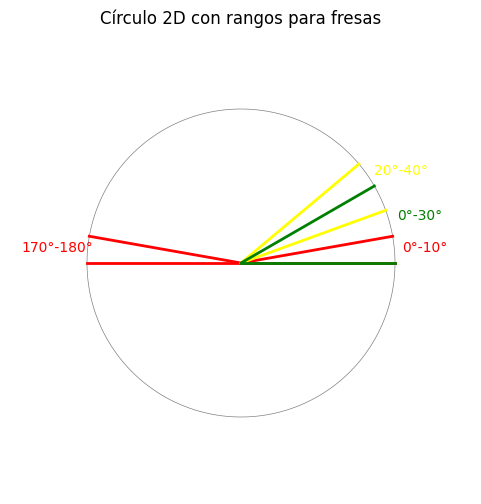

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Crear el círculo HSV en 2D sin colores
theta = np.linspace(0, 2 * np.pi, 360)
x = np.cos(theta)
y = np.sin(theta)

# Crear figura y dibujar el círculo
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, color='gray', linewidth=0.5)
ax.set_aspect('equal')

# Dibujar los rangos para fresas maduras, no maduras y blancas
ranges = [
    {"label": "Fresa madura (0°-10°)", "start": 0, "end": 10, "color": "red"},
    {"label": "Fresa madura (170°-180°)", "start": 170, "end": 180, "color": "red"},
    {"label": "Fresa no madura (20°-40°)", "start": 20, "end": 40, "color": "yellow"},
    {"label": "Fresa blanca/verde (0°-30°)", "start": 0, "end": 30, "color": "green"}
]

# Dibujar líneas para representar los rangos en el círculo
for r in ranges:
    start_angle = np.deg2rad(r["start"])
    end_angle = np.deg2rad(r["end"])
    mid_angle = np.deg2rad((r["start"] + r["end"]) / 2)

    # Dibujar líneas desde el centro para marcar los rangos
    ax.plot([0, np.cos(start_angle)], [0, np.sin(start_angle)], color=r["color"], linewidth=2)
    ax.plot([0, np.cos(end_angle)], [0, np.sin(end_angle)], color=r["color"], linewidth=2)

    # Etiqueta con el rango de grados
    ax.text(1.2 * np.cos(mid_angle), 1.2 * np.sin(mid_angle),
            f"{r['start']}°-{r['end']}°", color=r["color"], ha="center", va="center")

# Estética del gráfico
ax.set_title('Círculo 2D con rangos para fresas')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.axis('off')
plt.show()

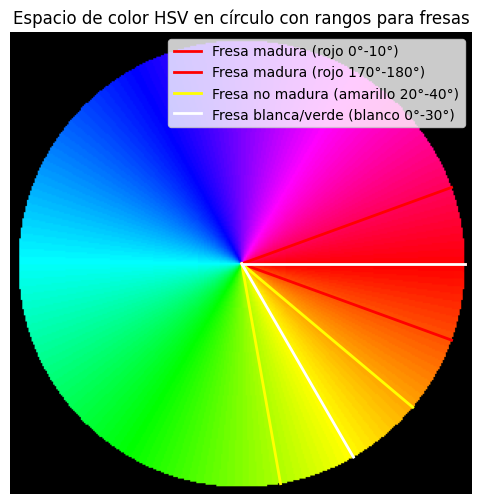

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Crear una imagen de un círculo HSV para representar el espacio de color
h, w = 300, 300  # Tamaño del círculo
hsv_circle = np.zeros((h, w, 3), dtype=np.uint8)

# Coordenadas del centro del círculo
center_x, center_y = w // 2, h // 2
radius = min(center_x, center_y) - 5

# Crear el círculo HSV
for y in range(h):
    for x in range(w):
        dx, dy = x - center_x, y - center_y
        distance = np.sqrt(dx**2 + dy**2)
        if distance <= radius:
            # Calcular el ángulo en grados (Hue)
            angle = (np.arctan2(dy, dx) * 180 / np.pi) % 360
            hue = int(angle / 2)  # Convertir ángulo a valor HSV (0-180 en OpenCV)
            saturation = 255
            value = 255 if distance < radius else 0
            hsv_circle[y, x] = [hue, saturation, value]

# Convertir de HSV a RGB para graficar
rgb_circle = cv2.cvtColor(hsv_circle, cv2.COLOR_HSV2RGB)

# Definir los rangos para fresas maduras, no maduras y blancas
ranges = [
    {"label": "Fresa madura (rojo 0°-10°)", "start": 0, "end": 10, "color": "red"},
    {"label": "Fresa madura (rojo 170°-180°)", "start": 170, "end": 180, "color": "red"},
    {"label": "Fresa no madura (amarillo 20°-40°)", "start": 20, "end": 40, "color": "yellow"},
    {"label": "Fresa blanca/verde (blanco 0°-30°)", "start": 0, "end": 30, "color": "white"}
]

# Crear círculo para graficar los rangos
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(rgb_circle)
for r in ranges:
    theta_start = np.deg2rad(r["start"] * 2)  # Convertir grados a radianes
    theta_end = np.deg2rad(r["end"] * 2)
    ax.plot([center_x, center_x + radius * np.cos(theta_start)],
            [center_y, center_y + radius * np.sin(theta_start)],
            color=r["color"], linewidth=2, label=r["label"])

    ax.plot([center_x, center_x + radius * np.cos(theta_end)],
            [center_y, center_y + radius * np.sin(theta_end)],
            color=r["color"], linewidth=2)

# Estética del gráfico
ax.set_title('Espacio de color HSV en círculo con rangos para fresas')
ax.axis('off')
plt.legend()
plt.show()

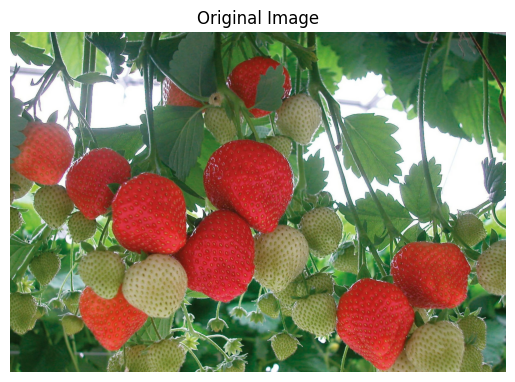

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "image.jpg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Original Image")
plt.axis("off")
plt.imshow(image)

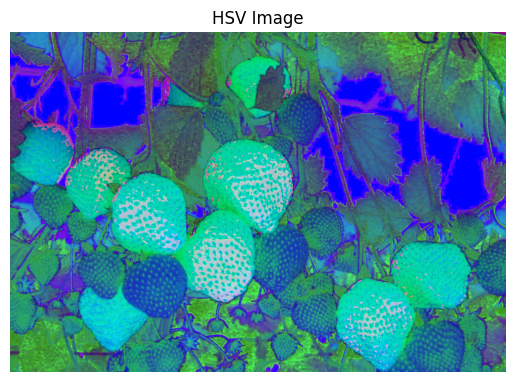

In [6]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.title("HSV Image")
plt.axis("off")
plt.imshow(hsv_image)

In [10]:
# Range for red ripe strawberries
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Range for yellow unripe strawberries
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Range for green-white unripe strawberries
lower_white = np.array([0, 0, 200])
upper_white = np.array([189, 30, 255])

In [12]:
# Making masks
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

mask_white = cv2.inRange(hsv_image, lower_white, upper_white)

In [13]:
# Applying masks
result_red = cv2.bitwise_and(image, image, mask=mask_red)
result_yellow = cv2.bitwise_and(image, image, mask=mask_yellow)
result_whtie = cv2.bitwise_and(image, image, mask=mask_white)

In [14]:
def show_segmented_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.axis("off")
    plt.imshow(image)

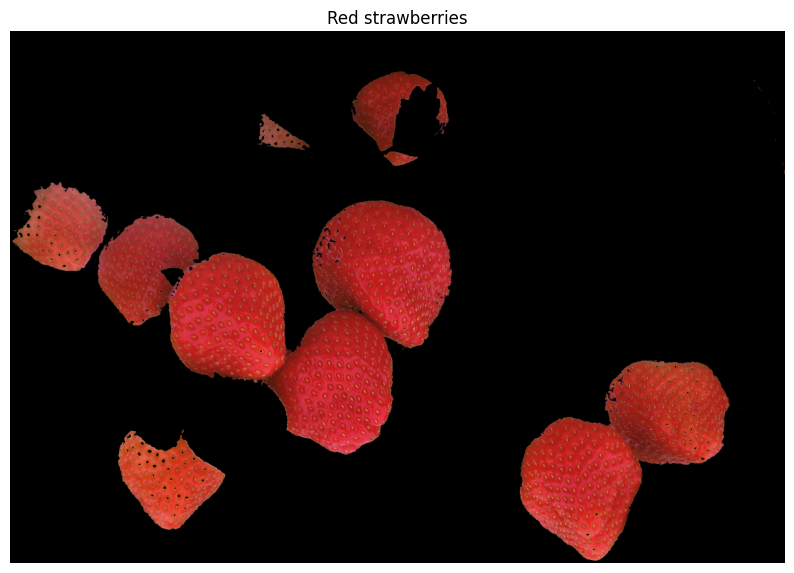

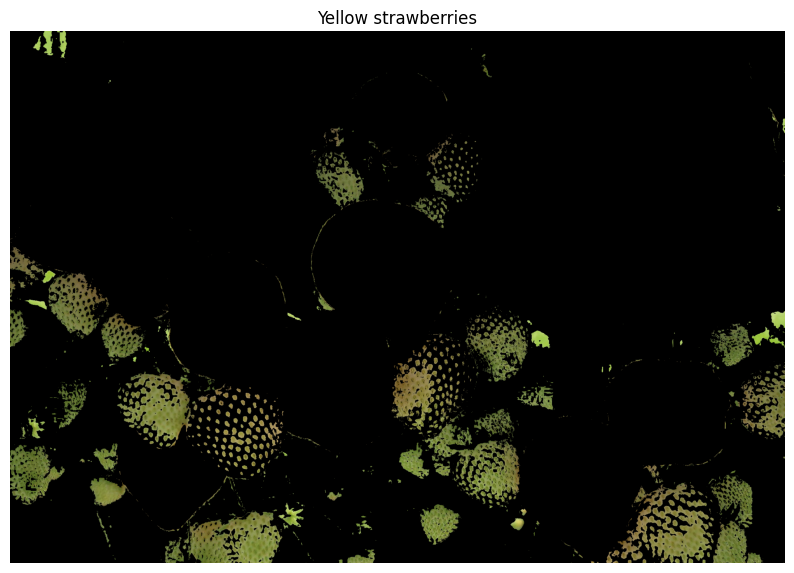

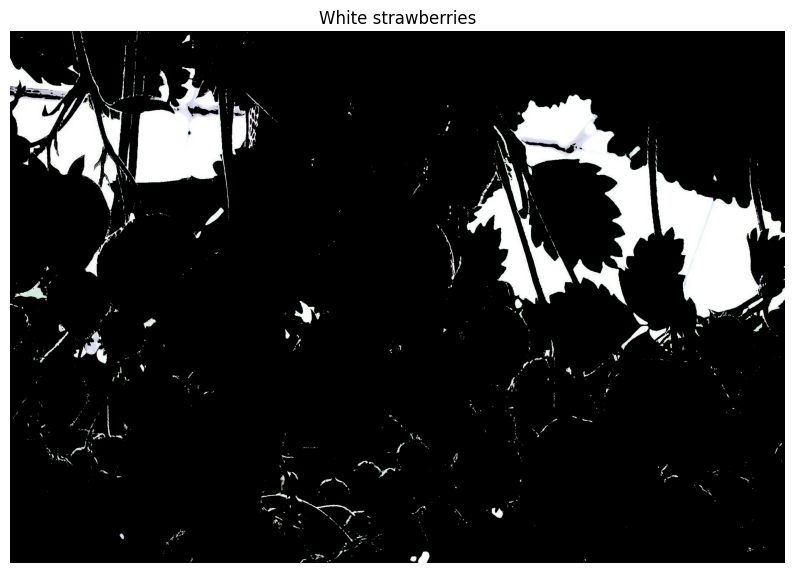

In [16]:
show_segmented_image("Red strawberries", result_red)
show_segmented_image("Yellow strawberries", result_yellow)
show_segmented_image("White strawberries", result_whtie)

In [27]:
def detect_contours(mask, color_name, color_rgb):

    blurred_image = cv2.GaussianBlur(mask, (15, 15), 0)

    contours, _ = cv2.findContours(blurred_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output_image = image.copy()

    for contour in contours:

        area = cv2.contourArea(contour)

        if area > 500:
            cv2.drawContours(output_image, [contour], -1, color_rgb, 2)
            cv2.putText(output_image, color_name, (contour[0][0][0], contour[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, color_rgb, 2)

    return output_image


def detect_contours_boxes(mask, color_name, color_rgb):

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output_image = image.copy()

    for contour in contours:

        area = cv2.contourArea(contour)

        if area > 500:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(output_image, (x, y), (x+w, y+h), color_rgb, 2)
            cv2.putText(output_image, color_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color_rgb, 2)

    return output_image

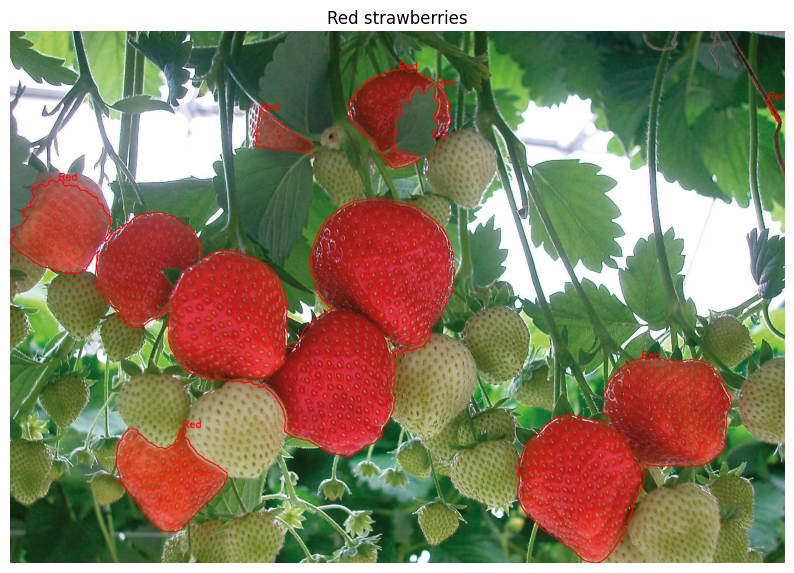

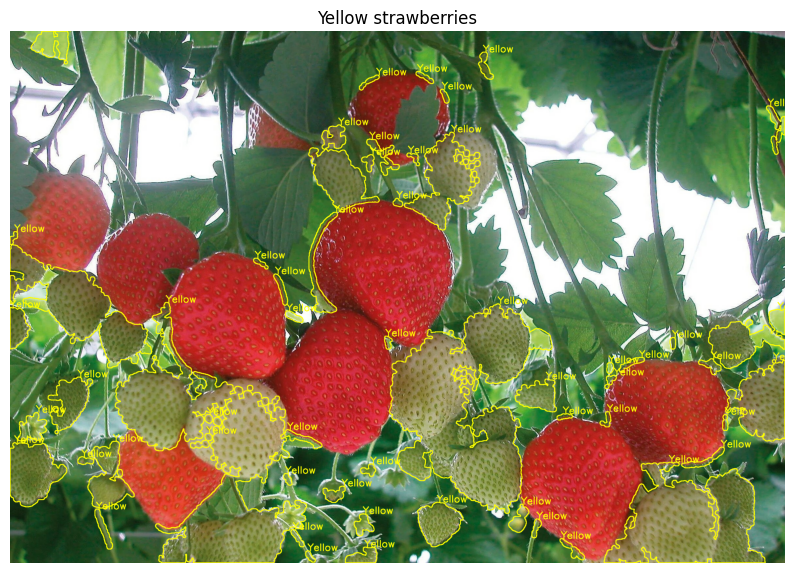

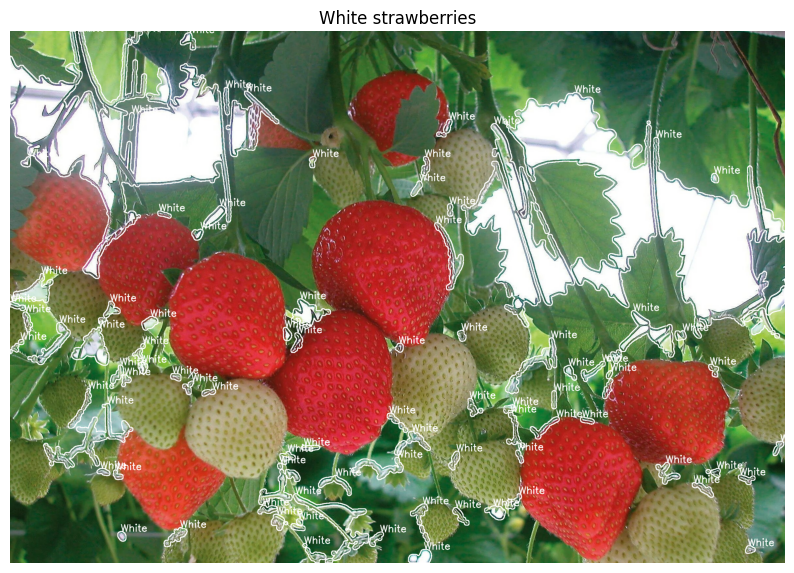

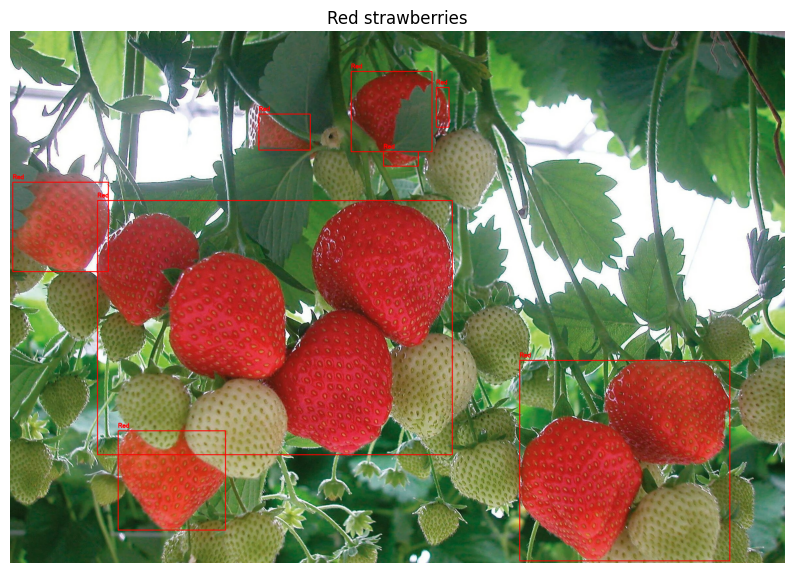

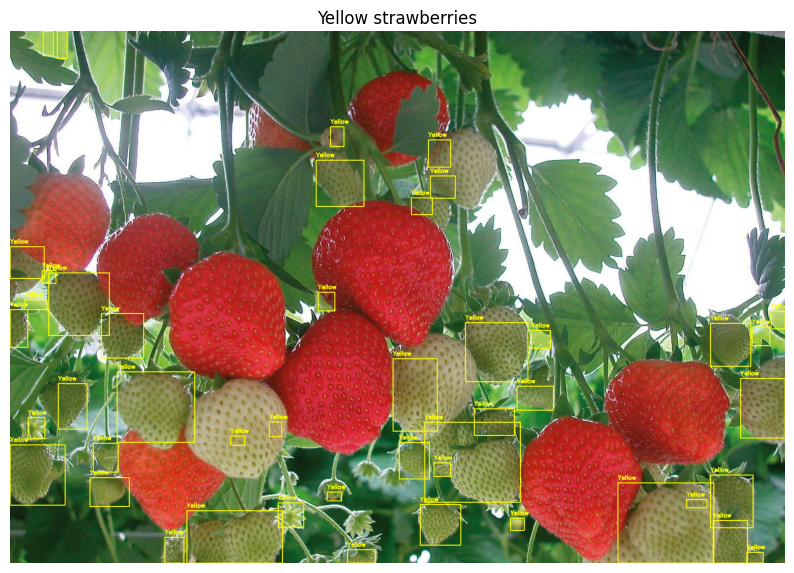

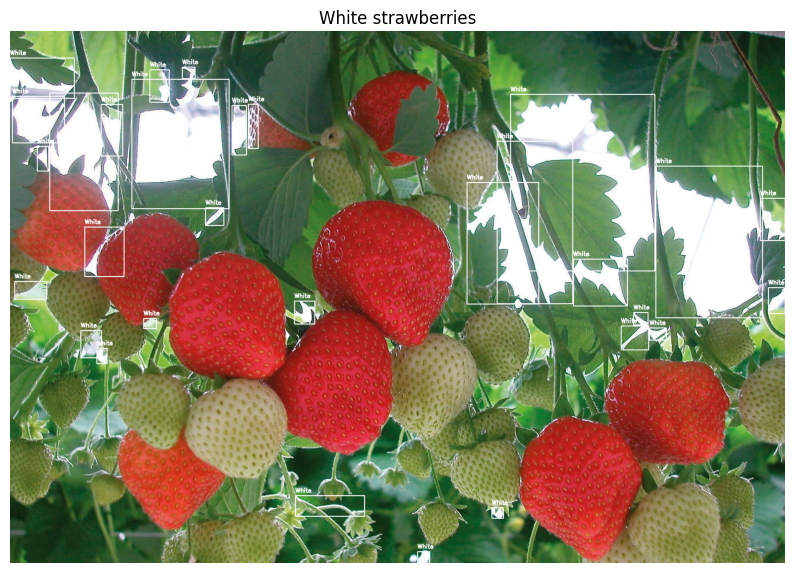

In [29]:
red_output = detect_contours(mask_red, "Red", (255, 0, 0))
yellow_output = detect_contours(mask_yellow, "Yellow", (255, 255, 0))
white_output = detect_contours(mask_white, "White", (255, 255, 255))

red_output2 = detect_contours_boxes(mask_red, "Red", (255, 0, 0))
yellow_output2 = detect_contours_boxes(mask_yellow, "Yellow", (255, 255, 0))
white_output2 = detect_contours_boxes(mask_white, "White", (255, 255, 255))

show_segmented_image("Red strawberries", red_output)
show_segmented_image("Yellow strawberries", yellow_output)
show_segmented_image("White strawberries", white_output)

show_segmented_image("Red strawberries", red_output2)
show_segmented_image("Yellow strawberries", yellow_output2)
show_segmented_image("White strawberries", white_output2)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirements ['onnx', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 160.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 91.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.0s, installed 2 packages: ['onnx', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Using ONNX Runtime CPUExecutionProvider

0: 640x640 4 Fr

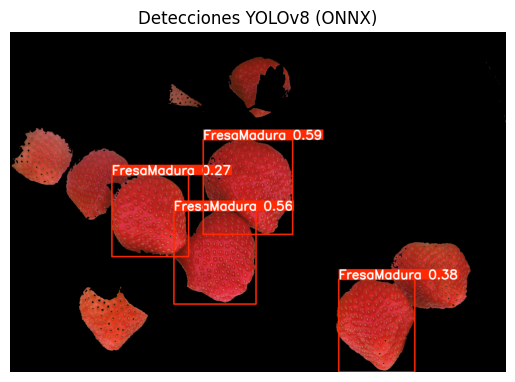

In [30]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Cargar el modelo ONNX exportado desde YOLOv8
model = YOLO('best.onnx', task='detect')  # Asegúrate de que 'best.onnx' es la ruta correcta al modelo

# Convertir la imagen de BGR a HSV
image = cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB)

# Realizar inferencia sobre la imagen
results = model(result_red)

# Obtener la imagen anotada con bounding boxes
annotated_frame = results[0].plot()

# Convertir de RGB a BGR para mostrar con OpenCV si es necesario
annotated_frame_bgr = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

# Mostrar la imagen anotada con Matplotlib
plt.imshow(cv2.cvtColor(annotated_frame_bgr, cv2.COLOR_BGR2RGB))
plt.title("Detections YOLOv8 (ONNX)")
plt.axis('off')
plt.show()